In [56]:
# %pip install biopython in binus PC
import Bio
from Bio.Seq import Seq

In [57]:
DNA = Seq("ATGGACGCGTGCGAT")
print("DNA: ", DNA)

DNA:  ATGGACGCGTGCGAT


In [58]:
# Calculate the AT and GC content of DNA

# User Defined function to calculate GC Content

def GC_content(DNA):
    # #create empty array

    # GC = []

    # #loop through seq, if its G or C, add to array

    # for base in DNA:
    #     if base in "GC":
    #         GC.append(base)

    # #return new arr/seq
    
    # return len(GC) / len(DNA) * 100

    # or
    return (DNA.count("G") + DNA.count("C")) / len(DNA)

def GC_array(DNA):
    gc = [x for x in DNA if x in "GC"]
    return gc

def AT_content(DNA):
    return 1-GC_content(DNA)

def AT_array(DNA):
    at = [x for x in DNA if x in "AT"]
    return at

print("The Concentration of GC is ", GC_content(DNA)*100, "%")
print("The Concentration of AT is ", AT_content(DNA)*100, "%")
print("The GC array is ", GC_array(DNA))
print("The AT array is ", AT_array(DNA))

The Concentration of GC is  60.0 %
The Concentration of AT is  40.0 %
The GC array is  ['G', 'G', 'C', 'G', 'C', 'G', 'G', 'C', 'G']
The AT array is  ['A', 'T', 'A', 'T', 'A', 'T']


In [59]:
from Bio.SeqUtils import gc_fraction # in binus pc, you import GC instead of gc_fraction

In [60]:
gcFraction = gc_fraction(DNA)
atFraction = 1 - gcFraction

print("The Concentration of GC is ", gcFraction)
print("The Concentration of AT is ", atFraction)

The Concentration of GC is  0.6
The Concentration of AT is  0.4


In [61]:
import matplotlib.pyplot as plt

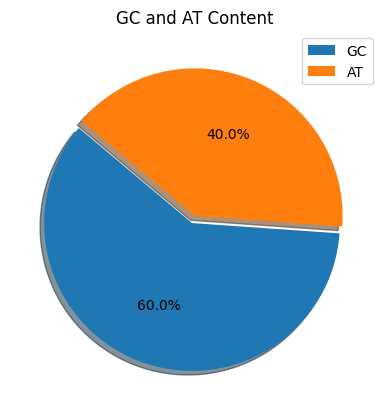

In [62]:
explode = (0.05, 0)
plt.pie([gcFraction, atFraction], explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(["GC", "AT"])
plt.title("GC and AT Content")
plt.show()

In [63]:
from Bio.SeqUtils import MeltingTemp as mt

In [64]:
# There are 3 ways to approach Melting Temperatures
gcWay = mt.Tm_GC(DNA) #Just taking into account the GC content, less accurate
neighbour = mt.Tm_NN(DNA) #Taking into account the nearest neighbour, more accurate
wallace = mt.Tm_Wallace(DNA) #A&T increases the temp by 2 degrees, G&C increases the temp by 4 degrees

print("The Melting Temperature using GC Way is", gcWay, "\u00b0C")
print("The Melting Temperature using Nearest Way is", neighbour, "\u00b0C")
print("The Melting Temperature using Wallace Way is", wallace, "\u00b0C")


The Melting Temperature using GC Way is 44.5029020719779 °C
The Melting Temperature using Nearest Way is 50.346125847238625 °C
The Melting Temperature using Wallace Way is 48.0 °C


In [65]:
# Home made Wallace
def wal(DNA):
    return float((DNA.count('A')+DNA.count('T'))*2 + (DNA.count('G')+DNA.count('C'))*4)

print("The Melting Temperature using Wallace Way is ", wal(DNA), "\u00b0C")

The Melting Temperature using Wallace Way is  48.0 °C


In [66]:
# Molecular Weight

from Bio.SeqUtils import molecular_weight as mw

In [68]:
print("The Molecular Weight of the DNA is", mw(DNA), "g/mol") # Dalton -> g/mol -> 6.022 x 10^23

The Molecular Weight of the DNA is 4712.995199999999 g/mol


In [83]:
# Calculate the G molecular weight of our DNA
# Make it into a versatile function that is able to calculate other nucleotides

def mWeight(DNA, nucleotide):
    return DNA.count(nucleotide) * mw(nucleotide)

# or

def mWeight2(DNA, nucleotide):
    n = [x for x in DNA if x in nucleotide] #still an array of characters
    nString = ''.join(n) #convert array to string
    return mw(nString)

# G = 329.21 g/mol

print(mWeight(DNA, "G"), mWeight(DNA, "C"), mWeight(DNA, "A"), mWeight(DNA, "T"))
print(mWeight(DNA, "G")+ mWeight(DNA, "C")+mWeight(DNA, "A")+ mWeight(DNA, "T"))
print(mWeight2(DNA, "G"), mWeight2(DNA, "C"), mWeight2(DNA, "A"), mWeight2(DNA, "T"))
print(mWeight2(DNA, "G")+ mWeight2(DNA, "C")+mWeight2(DNA, "A")+ mWeight2(DNA, "T"))

print(mw(DNA))

# mWeight(DNA, "G")



2083.3272 921.5912999999999 993.6653999999999 966.6255000000001
4965.2094
1993.2507000000003 885.5606999999999 957.6347999999998 930.5949
4767.0411
4712.995199999999
